In [10]:
import os
import math
# Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Preprocessing
from sklearn.preprocessing import MinMaxScaler
# Algorithms
from minisom import MiniSom
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

In [11]:
directory = './intensOcupation'

mySeries = []
namesofMySeries = []
counter=0
for filename in os.listdir(directory):
    
    if filename.endswith(".csv") :
        #df = pd.read_csv(directory+"/"+filename)
        #df = df.loc[:,["intensidad"]]
        # While we are at it I just filtered the columns that we will be working on

        # ,set the date columns as index
        # and lastly, ordered the data according to our date index
        mySeries.append(df)
        df = pd.read_csv(directory+"/"+filename)

        df = df.loc[:,["ocupacion"]]
        mySeries.append(df)



        namesofMySeries.append(filename)
        namesofMySeries.append(filename)
        counter+=1




In [12]:
print(len(mySeries))
print(namesofMySeries)

1368
['evolucion_diaria_intensidad.2022.08.19.csv', 'evolucion_diaria_intensidad.2022.08.19.csv', 'evolucion_diaria_intensidad.2021.11.07.csv', 'evolucion_diaria_intensidad.2021.11.07.csv', 'evolucion_diaria_intensidad.2021.12.17.csv', 'evolucion_diaria_intensidad.2021.12.17.csv', 'evolucion_diaria_intensidad.2021.07.24.csv', 'evolucion_diaria_intensidad.2021.07.24.csv', 'evolucion_diaria_intensidad.2021.12.07.csv', 'evolucion_diaria_intensidad.2021.12.07.csv', 'evolucion_diaria_intensidad.2021.07.12.csv', 'evolucion_diaria_intensidad.2021.07.12.csv', 'evolucion_diaria_intensidad.2022.07.22.csv', 'evolucion_diaria_intensidad.2022.07.22.csv', 'evolucion_diaria_intensidad.2021.08.31.csv', 'evolucion_diaria_intensidad.2021.08.31.csv', 'evolucion_diaria_intensidad.2022.03.07.csv', 'evolucion_diaria_intensidad.2022.03.07.csv', 'evolucion_diaria_intensidad.2022.05.13.csv', 'evolucion_diaria_intensidad.2022.05.13.csv', 'evolucion_diaria_intensidad.2021.10.19.csv', 'evolucion_diaria_intensidad

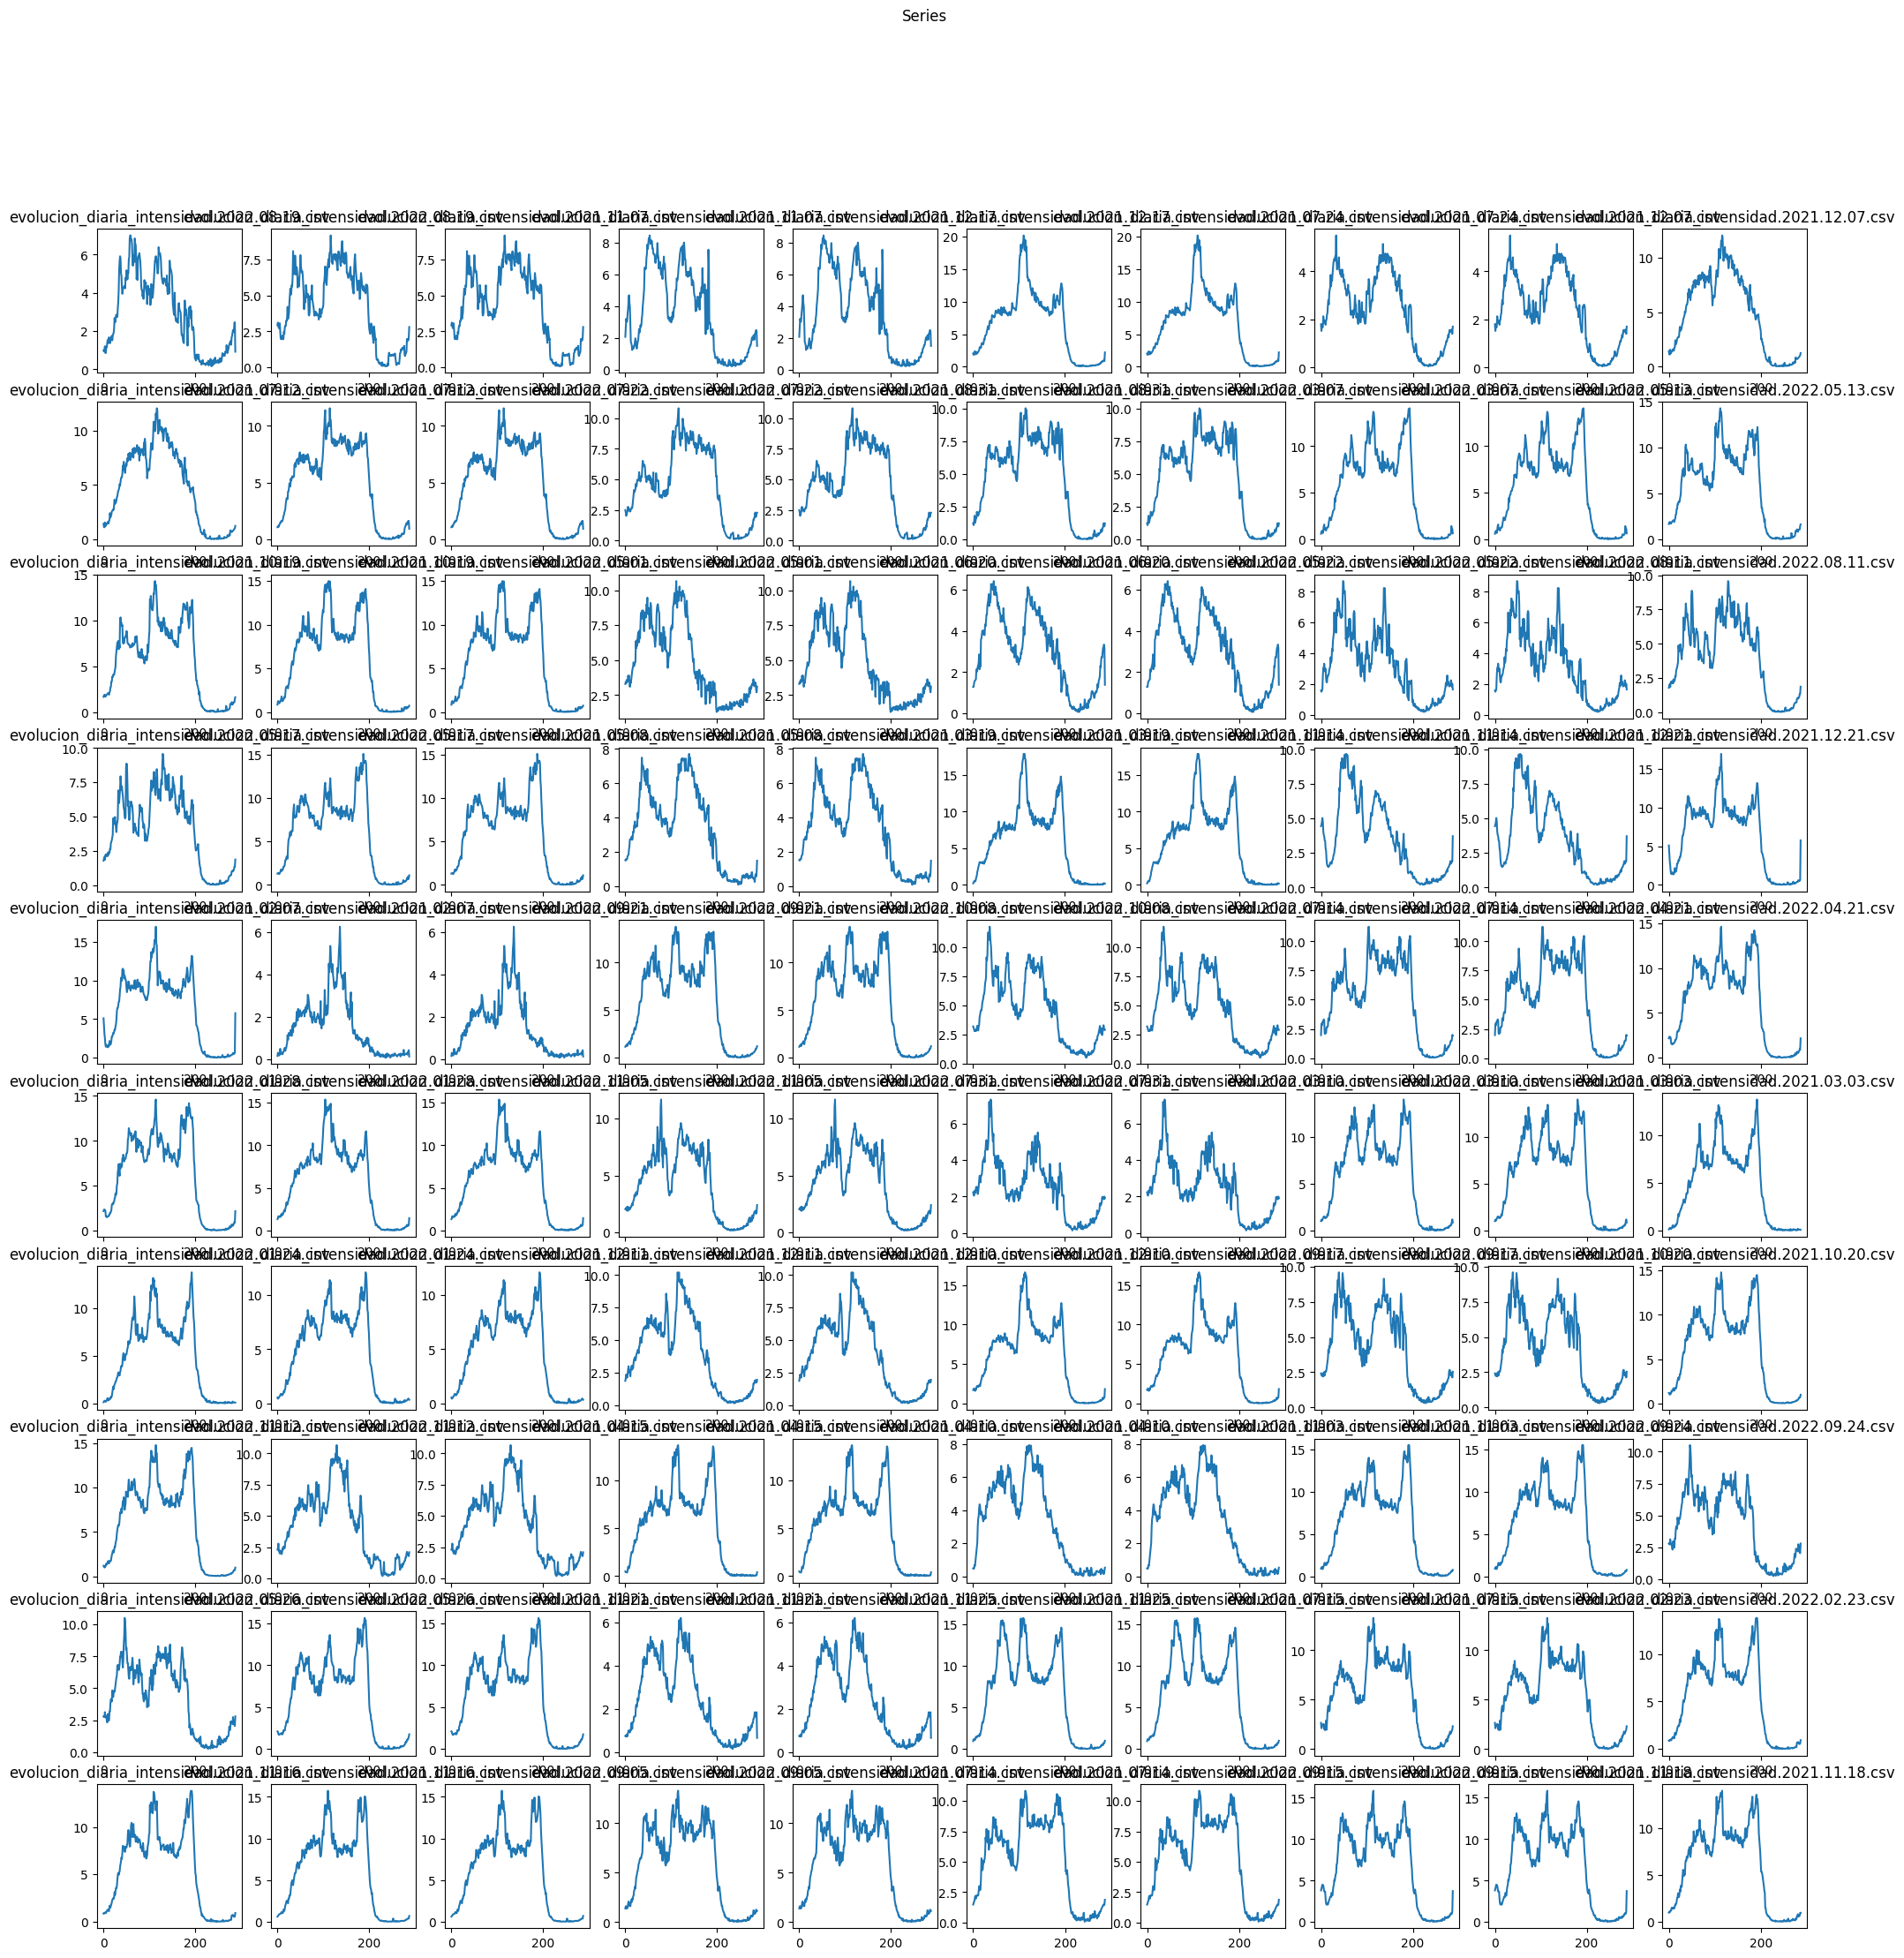

In [13]:
fig, axs = plt.subplots(10,10,figsize=(25,25))
fig.suptitle('Series')
k=0

for i in range(10):
    for j in range(10):
        if i*4+j+1>len(mySeries): # pass the others that we can't fill
            continue


        axs[i, j].plot(mySeries[k].values)
        axs[i, j].set_title(namesofMySeries[k])


        k+=1
plt.show()

In [14]:

ind = 0
series_lengths=[]
for series in mySeries:
    print("["+str(ind)+"] "+str(series.index[0])+" "+str(series.index[len(series)-1]))
    ind+=1
    series_lengths.append(series.index[len(series)-1])


[0] 0 287
[1] 0 287
[2] 0 287
[3] 0 287
[4] 0 287
[5] 0 287
[6] 0 287
[7] 0 287
[8] 0 287
[9] 0 287
[10] 0 287
[11] 0 287
[12] 0 287
[13] 0 287
[14] 0 287
[15] 0 287
[16] 0 287
[17] 0 287
[18] 0 287
[19] 0 287
[20] 0 287
[21] 0 287
[22] 0 287
[23] 0 287
[24] 0 287
[25] 0 287
[26] 0 287
[27] 0 287
[28] 0 287
[29] 0 287
[30] 0 287
[31] 0 287
[32] 0 287
[33] 0 287
[34] 0 287
[35] 0 287
[36] 0 287
[37] 0 287
[38] 0 287
[39] 0 287
[40] 0 287
[41] 0 287
[42] 0 287
[43] 0 287
[44] 0 287
[45] 0 287
[46] 0 287
[47] 0 287
[48] 0 287
[49] 0 287
[50] 0 287
[51] 0 287
[52] 0 287
[53] 0 287
[54] 0 287
[55] 0 287
[56] 0 287
[57] 0 287
[58] 0 287
[59] 0 287
[60] 0 287
[61] 0 287
[62] 0 287
[63] 0 287
[64] 0 287
[65] 0 287
[66] 0 287
[67] 0 287
[68] 0 287
[69] 0 287
[70] 0 287
[71] 0 287
[72] 0 287
[73] 0 287
[74] 0 287
[75] 0 287
[76] 0 287
[77] 0 287
[78] 0 287
[79] 0 287
[80] 0 287
[81] 0 287
[82] 0 287
[83] 0 287
[84] 0 287
[85] 0 287
[86] 0 287
[87] 0 287
[88] 0 287
[89] 0 287
[90] 0 287
[91] 0 28

In [15]:

max_len = max(series_lengths)
longest_series = None
for series in mySeries:
    if len(series)-1 == max_len:
        longest_series = series


In [16]:

print(longest_series)


     ocupacion
0     0.112676
1     0.180556
2     0.295775
3     0.237209
4     0.250000
..         ...
286   0.076923
287   0.519231
288   0.466346
289   0.163462
290   0.084507

[291 rows x 1 columns]


In [17]:

problems_index = []

for i in range(len(mySeries)):
    if len(mySeries[i])!= max_len:
        problems_index.append(i)
        mySeries[i] = mySeries[i].reindex(longest_series.index)
    

In [18]:

def nan_counter(list_of_series):
    nan_polluted_series_counter = 0
    for series in list_of_series:
        if series.isnull().sum().sum() > 0:
            nan_polluted_series_counter+=1
    print(nan_polluted_series_counter)
    

In [19]:
for i in problems_index:
    mySeries[i].interpolate(limit_direction="both",inplace=True)

In [20]:
for i in range(len(mySeries)):
    scaler = MinMaxScaler()
    mySeries[i] = MinMaxScaler().fit_transform(mySeries[i])
    mySeries[i]= mySeries[i].reshape(len(mySeries[i]))

In [21]:

som_y =som_y2= math.ceil(math.sqrt(math.sqrt(len(mySeries))))
# I didn't see its significance but to make the map square,
# I calculated square root of map size which is
# the square root of the number of series
# for the row and column counts of som
print(som_y2)

som = MiniSom(som_y, som_y2,len(mySeries[0]), sigma=0., learning_rate = 0.1)

som.random_weights_init(mySeries)
som.train(mySeries, 5000)


7


/home/ana/.local/lib/python3.8/site-packages/minisom.py:258: RuntimeWarning: divide by zero encountered in divide
  ax = exp(-power(self._xx-self._xx.T[c], 2)/d)
/home/ana/.local/lib/python3.8/site-packages/minisom.py:258: RuntimeWarning: invalid value encountered in divide
  ax = exp(-power(self._xx-self._xx.T[c], 2)/d)
/home/ana/.local/lib/python3.8/site-packages/minisom.py:259: RuntimeWarning: divide by zero encountered in divide
  ay = exp(-power(self._yy-self._yy.T[c], 2)/d)
/home/ana/.local/lib/python3.8/site-packages/minisom.py:259: RuntimeWarning: invalid value encountered in divide
  ay = exp(-power(self._yy-self._yy.T[c], 2)/d)


ValueError: operands could not be broadcast together with shapes (290,) (7,7,291) 

In [17]:
# Little handy function to plot series
def plot_som_series_averaged_center(som_x, som_y, win_map):
    fig, axs= plt.subplots(som_x,som_y,figsize=(25,25))
    fig, plot1= plt.subplots(som_x,som_y,figsize=(25,25))

    fig.suptitle('Clusters')
    for x in range(som_x):
        for y in range(som_y):
            cluster = (x,y)
            if cluster in win_map.keys():
                for series in win_map[cluster]:
                    axs[cluster].plot(series,c="gray",alpha=0.5) 
                axs[cluster].plot(np.average(np.vstack(win_map[cluster]),axis=1),c="blue")
                plot1[cluster].plot(np.average(np.vstack(win_map[cluster]),axis=1),c="blue")

            cluster_number = x*som_y+y+1
            axs[cluster].set_title(f"Cluster {cluster_number}")

    plt.show()

In [18]:
win_map = som.win_map(mySeries)
# Returns the mapping of the winner nodes and inputs

plot_som_series_averaged_center(som_x, som_y, win_map)

ValueError: operands could not be broadcast together with shapes (290,) (6,6,291) 